# Model Testing
This document tests the performance of the model after data cleaning, data summarisation, feature extraction, and hyperparameter tuning.

Model accuracy is explored using two approaches:

1. Quantitative
2. Visually

To begin with, we will perform the necessary imports and load the summary dataset.

In [1]:
# Import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from lib.constants import DATA_PATH
from lib.create_model import create_model
from lib.train_model import train_model
from lib.helpers import _create_test_train_split

# Load batter summary data.
summary = pd.read_csv(
    DATA_PATH + "/Batter_Summary_Reduced.txt", delimiter="\t")
summary = summary.drop(columns=["Name", "Batter_ID"])


## 1. Create the Model.
Firstly, we must create the training and testing datasets, create the model, and train the model.

In [18]:
# Create test and training datasets.
X_train, X_test, y_train, y_test = _create_test_train_split(summary)

# Create the model.
model = create_model()

# Train the model.
model = train_model(model)


## 2. Test the Model's Quantitative Accuracy.
To quantify the model's accuracy, we will use three metrics:

1. Coefficient of determination (R^2)
2. Mean Absolute Error (MAE)
3. Root Mean Squared Error (RMSE)

These are explored below.

### 2.1 Coefficient of Determination.
Coefficient of Determination describes the percentage of variation in the target variable explained by the features. This is the default score method for a Random Forest.

In [57]:
# Test the accuracy of the model.
accuracy = model.score(X_test, y_test)

# Print the model's accuracy.
print("The model's accuracy using coefficient of determination is: {}".format(accuracy))


The model's accuracy using coefficient of determination is: 0.7971580827666123


### 2.2 Mean Absolute Error.
Mean Absolute Error is a linear score that weights all errors equally. For our model, MAE describes how far from the true average the predicted average is.

In [20]:
# Make a prediction using the trained model.
y_pred_test = model.predict(X_test)

# Print the Mean Absolute Error.
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_test))


Mean Absolute Error: 3.4173125780217624


### 2.3 Root Mean Squared Error.
Root Mean Squared Error is a quadratic score that penalises larger errors. 

In [21]:
# Make a prediction using the trained model.
y_pred_test = model.predict(X_test)

# Print the Mean Squared Error.
print('Root Mean Squared Error:', np.sqrt(
    mean_squared_error(y_test, y_pred_test)))


Root Mean Squared Error: 4.498000852220114


## 3. Accuracy Visualisation.
To visualise the accuracy of the model, the true and predicted batting averages will be plotted in a scatter plot on the x and y axes, respectively. If the model is able to accurately predict the player's batting average, the scatter point will fall closer to the main diagonal.

Text(0.5, 1.0, 'Comparison of True and Predicted Averages')

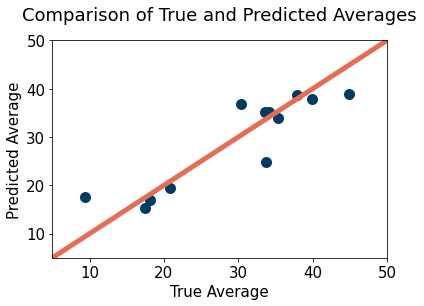

In [48]:
# Plot each batter's predicted and true average.
plt.scatter(y_test, y_pred_test, color="#003b63", linewidth=5)

# Plot the main diagonal.
plt.axline([10, 10], [47.5, 47.5], color="#e56d54", linewidth=5)

# Figure configurations.
plt.xlim([5, 50])
plt.ylim([5, 50])
plt.rcParams.update({'font.size': 15})
plt.xlabel("True Average")
plt.ylabel("Predicted Average")
plt.title("Comparison of True and Predicted Averages", pad=20)
